In [ ]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2
from google.colab import drive

# Set up path for saving images
drive.mount('/content/drive')
savePath = "/content/drive/MyDrive/Colab Notebooks"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# tests.py

def check_equal(testArr, truthArr, errorThresh = 0):
  isEqual = True
  if testArr.shape != truthArr.shape:
    return False
  for i in range(testArr.shape[0]):
    for j in range(testArr.shape[1]):
      if abs(testArr[i,j] - truthArr[i,j]) > errorThresh:
        print(f"Error at {i},{j} ")
        print(f"Value: {testArr[i,j]}")
        print(f"Expected: {truthArr[i,j]}")
        isEqual = False
  return isEqual

In [ ]:
'''
Module: interp.py
Author: Ian McAtee
Date: November 25, 2024
Description: Provides functions for the following interpolation methods:
    - Nearest Neighbor (Single Variable and Image Variations)
    - Linear and Bilinear
    - Cubic and Bicubic
'''

# Import dependencies
import math
import numpy as np

##### NEAREST NEIGHBOR INTERPOLATION METHODS #####

def nearest_neighbor(signal: np.ndarray, newLen: int) -> np.ndarray:
  interval = (len(signal)-1)/(newLen-1)
  interpSignal = np.zeros(newLen)
  for i in range(newLen):
    interpSignal[i] = signal[round(i*interval)]
  return interpSignal

def nearest_neighbor2(img: np.ndarray, newShape: tuple) -> np.ndarray:
  interpImg = np.zeros(newShape)
  xInterval = (img.shape[1])/(newShape[1])
  yInterval = (img.shape[0])/(newShape[0])
  for y in range(newShape[0]):
    for x in range(newShape[1]):
      interpImg[y,x] = img[math.floor(y*yInterval), math.floor(x*xInterval)]
  return interpImg

##### LINEAR INTERPOLATION METHODS #####

def linear(signal: np.ndarray, newLen: int) -> np.ndarray:
  interval = (len(signal)-1)/(newLen-1)
  interpSignal = np.zeros(newLen)
  for i in range(newLen):
    x = i*interval
    x0 = math.floor(x)
    x1 = math.ceil(x)
    if x0 == x1:
      interpSignal[i] = signal[x0]
      continue
    y0 = signal[x0]
    y1 = signal[x1]
    interpSignal[i] = y0+(x-x0)*((y1-y0)/(x1-x0))
  return interpSignal

def bilinear(img, newShape):
  xScale = newShape[1]/img.shape[1]
  yScale = newShape[0]/img.shape[0]

  tempArr = np.zeros((img.shape[0], newShape[1]))
  for j in range(newShape[1]):
    x = (j+0.5)*(1/xScale)-0.5
    if x <= 0 or x >= img.shape[1]-1:
      tempArr[:,j] = img[:,int(x)]
      continue
    x1 = math.floor(x)
    x2 = math.ceil(x)
    if (x1 == x2):
      tempArr[:,j] = img[:,x1]
      continue
    for i in range(img.shape[0]):
      tempArr[i,j] = (x2-x)*img[i,x1] + (x-x1)*img[i,x2]

  # Interpolate across columns
  interpImg = np.zeros((newShape[0], newShape[1]))
  for i in range(newShape[0]):
    y = (i+0.5)*(1/yScale)-0.5
    if y <= 0 or y >= img.shape[0]-1:
      interpImg[i,:] = tempArr[int(y),:]
      continue
    y1 = math.floor(y)
    y2 = math.ceil(y)
    if (y1 == y2):
      interpImg[i,:] = tempArr[y1,:]
      continue
    for j in range(newShape[1]):
      interpImg[i,j] = (y2-y)*tempArr[y1,j] + (y-y1)*tempArr[y2,j]
  return interpImg

##### CUBIC INTERPOLATION METHODS #####
# NOT IMPLEMENTED


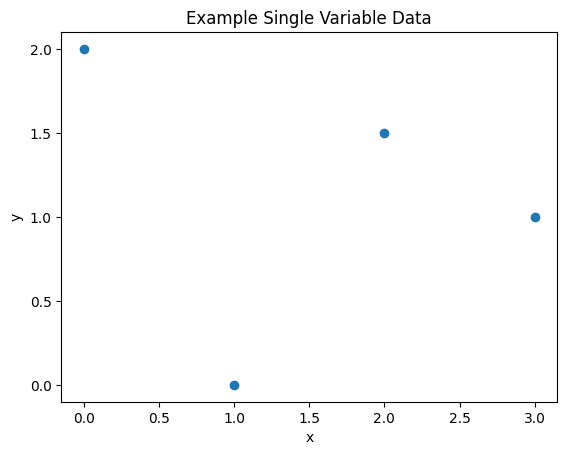

---------------------------------------
Squares Test Image Shape: (5, 5)
Camera Man Test Image Shape: (256, 256)
---------------------------------------


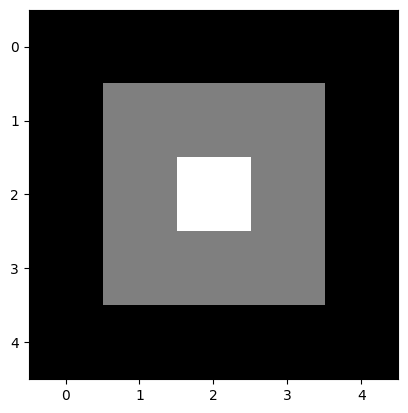

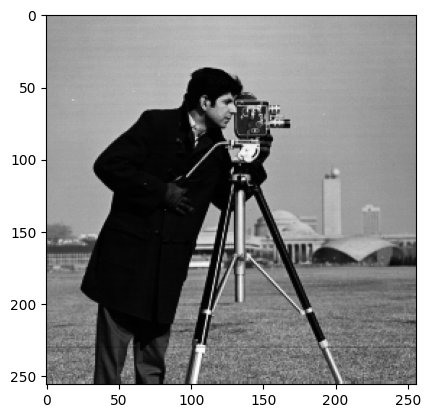

True

In [ ]:
### DATA SETUP ###

# Form single variable data
testData = np.array([2, 0, 1.5, 1])

# Plot single variable data
plt.scatter(np.arange(len(testData)), testData)
plt.title("Example Single Variable Data")
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(np.arange(0,3.5,0.5))
plt.yticks(np.arange(0,2.5,0.5))
plt.show()

# Get test grayscale image data
testImgPath = savePath + "/cameraman.tif"
cameraImg = cv2.imread(testImgPath, cv2.IMREAD_GRAYSCALE)

# Form test image
testImg = np.array([[0,  0,  0,  0,0],
                    [0,0.5,0.5,0.5,0],
                    [0,0.5,1,0.5,0],
                    [0,0.5,0.5,0.5,0],
                    [0,  0,  0,  0,0]])

testImg = np.array([[0,  0,  0,  0,0],
                    [0,127,127,127,0],
                    [0,127,255,127,0],
                    [0,127,127,127,0],
                    [0,  0,  0,  0,0]])


# Display test image shapes
print("---------------------------------------")
print(f"Squares Test Image Shape: {testImg.shape}")
print(f"Camera Man Test Image Shape: {cameraImg.shape}")
print("---------------------------------------")

# Plot test images
plt.imshow(testImg, cmap="gray")
plt.show()
plt.imshow(cameraImg, cmap="gray")
plt.show()

# Save test images
cv2.imwrite(savePath+"/SquaresImgOriginal5x5.png", testImg)
cv2.imwrite(savePath+"/CameraImgOriginal256x256.png", cameraImg)

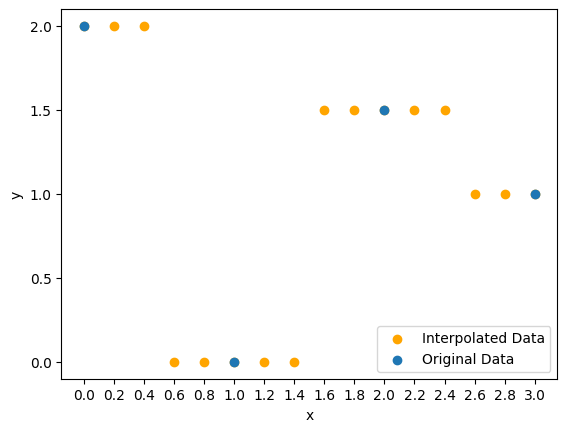

In [ ]:
### SINGLE VARIABLE NEAREST NEIGHBOR INTERPOLATION ###

# Interpolate the test data to 16 points
newLen = 16
nnInterpData = nearest_neighbor(testData, newLen)

# Create new x indices for the interpolated data
newIndices = np.linspace(0,len(testData)-1,newLen)

# Plot the interpolated signal
plt.scatter(newIndices, nnInterpData, c="orange")
plt.scatter(np.arange(len(testData)), testData, c="tab:blue")
plt.legend(["Interpolated Data", "Original Data"], loc = "lower right")
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(newIndices)
plt.yticks(np.arange(0,2.5,0.5))
plt.show()

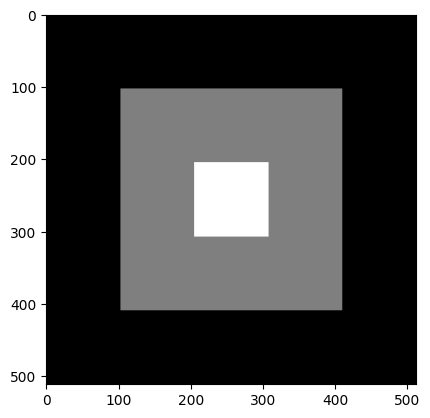

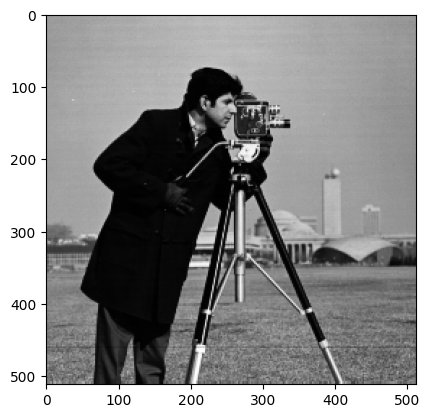

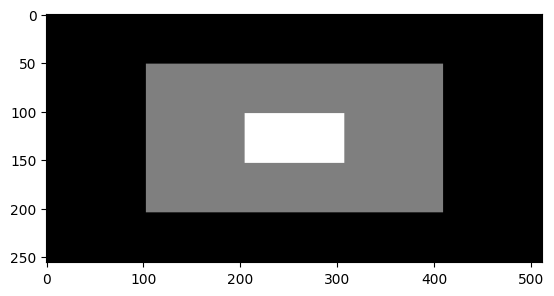

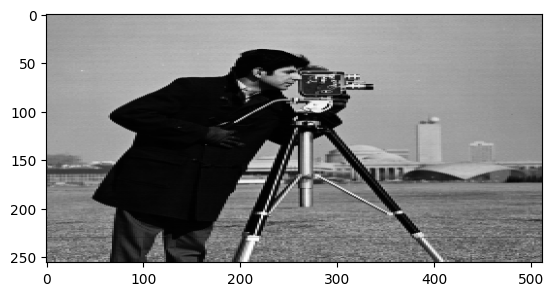

True

In [ ]:
### IMAGE NEAREST NEIGHBOR INTERPOLATION ###

# Nearest neighbor interpolate the test and camera images to 512x512
newSize = (512,512)
nnInterpTestImg = nearest_neighbor2(testImg, newSize)
nnInterpCamImg = nearest_neighbor2(cameraImg, newSize)

# Plot interpolated images
plt.imshow(nnInterpTestImg, cmap="gray")
plt.show()
plt.imshow(nnInterpCamImg, cmap="gray")
plt.show()

# Save interpolated images
cv2.imwrite(savePath+"/nnInterpTestImg512x512.png", nnInterpTestImg)
cv2.imwrite(savePath+"/nnInterpCamImg512x512.png", nnInterpCamImg)

# Nearest neighbor interpolate the test and camera images to 256x512
newSize = (256,512)
nnInterpStretchTestImg = nearest_neighbor2(testImg, newSize)
nnInterpStretchCamImg = nearest_neighbor2(cameraImg, newSize)

# Plot interpolated stretched images
plt.imshow(nnInterpStretchTestImg, cmap="gray")
plt.show()
plt.imshow(nnInterpStretchCamImg, cmap="gray")
plt.show()

# Save interpolated stretched images
cv2.imwrite(savePath+"/nnInterpTestImg256x512.png", nnInterpStretchTestImg)
cv2.imwrite(savePath+"/nnInterpCamImg256x512.png", nnInterpStretchCamImg)



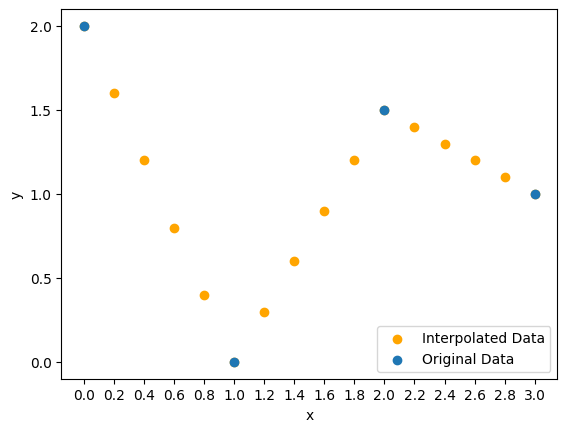

In [ ]:
### LINEAR INTERPOLATION ###

# Linear interpolate the test data to 16 points
newLen = 16
linInterpData = linear(testData, newLen)

# Create new x indices for the interpolated data
newIndices = np.linspace(0,len(testData)-1,newLen)

# Plot the interpolated signal
plt.scatter(newIndices, linInterpData, c="orange")
plt.scatter(np.arange(len(testData)), testData, c="tab:blue")
plt.legend(["Interpolated Data", "Original Data"], loc = "lower right")
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(newIndices)
plt.yticks(np.arange(0,2.5,0.5))
plt.show()

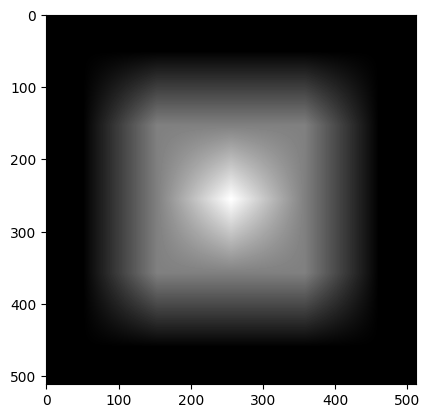

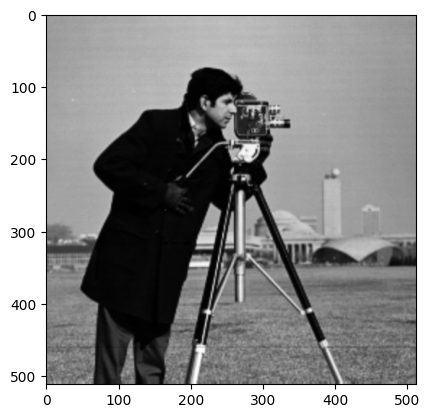

True

In [ ]:
### BILINEAR INTERPOLATION ###

# Bilinear interpolate the test and camera images to 512x512
newSize = (512,512)
bilinInterpTestImg = bilinear(testImg, newSize)
bilinInterpCamImg = bilinear(cameraImg, newSize)


# Plot interpolated images
plt.imshow(bilinInterpTestImg, cmap="gray")
plt.show()
plt.imshow(bilinInterpCamImg, cmap="gray")
plt.show()

# Save interpolated images
cv2.imwrite(savePath+"/bilinInterpTestImg512x512.png", bilinInterpTestImg)
cv2.imwrite(savePath+"/bilinInterpCamImg512x512.png", bilinInterpCamImg)

cvBilinTest = cv2.resize(cameraImg, (512,512), interpolation = cv2.INTER_LINEAR)
check_equal(bilinInterpCamImg, cvBilinTest, errorThresh=1)

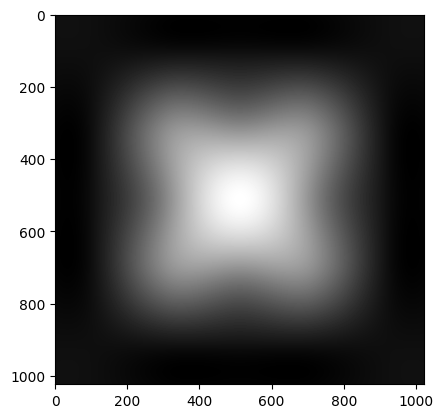

In [ ]:
cvCubicTest = cv2.resize(testImg/255, (1024,1024), interpolation = cv2.INTER_CUBIC)

plt.imshow(cvCubicTest, cmap="gray")
plt.show()